<a href="https://colab.research.google.com/github/Melancholic-Angel/FYP-Uni/blob/main/Rishitha_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full Efficiency Analysis (Input Correct Reference Efficiency)

=== Enhanced Vehicle Efficiency Analysis System ===
This notebook will:
1. Load your vehicle data from Excel/CSV file
2. Calculate efficiency using MAF data with proper formulas
3. Train multiple models: XGBoost, HistGradientBoosting, CatBoost
4. Perform SHAP analysis for feature importance
5. Predict optimal RPM and gear ratios for speed ranges
6. Provide comprehensive optimization recommendations


📁 STEP 1: Upload your data file
Please upload your vehicle data file (Excel or CSV)...


Saving all_data_combined.xlsx to all_data_combined (3).xlsx
✅ File uploaded: all_data_combined (3).xlsx

📊 STEP 2: Loading and preprocessing data...
Initial data shape: (3070, 19)
Columns: ['Timestamp_GPS', 'RPM', 'Speed', 'Engine_Load', 'Absolute_Engine_Load', 'Throttle_Position', 'Relative_Throttle_Position', 'MAF', 'Engine_Runtime', 'Accel_X (m/sÂ²)', 'Accel_Y (m/sÂ²)', 'Accel_Z (m/sÂ²)', 'Gyro_X (Â°/s)', 'Gyro_Y (Â°/s)', 'Gyro_Z (Â°/s)', 'Latitude', 'Longitude', 'Wheel_RPM', 'Gear_Ratio']
Data shape after cleaning: (3010, 19)

📋 First 5 rows of cleaned data:
        Timestamp_GPS      RPM  Speed  Engine_Load  Absolute_Engine_Load  \
0 2025-07-12 16:11:32  1262.50      5        81.57                   0.0   
1 2025-07-12 16:11:33  1468.75      7        90.59                   0.0   
2 2025-07-12 16:11:34  1602.25     10        93.33                   0.0   
3 2025-07-12 16:11:35  1793.75     13        92.16                   0.0   
4 2025-07-12 16:11:36  1832.75     16        92.16 

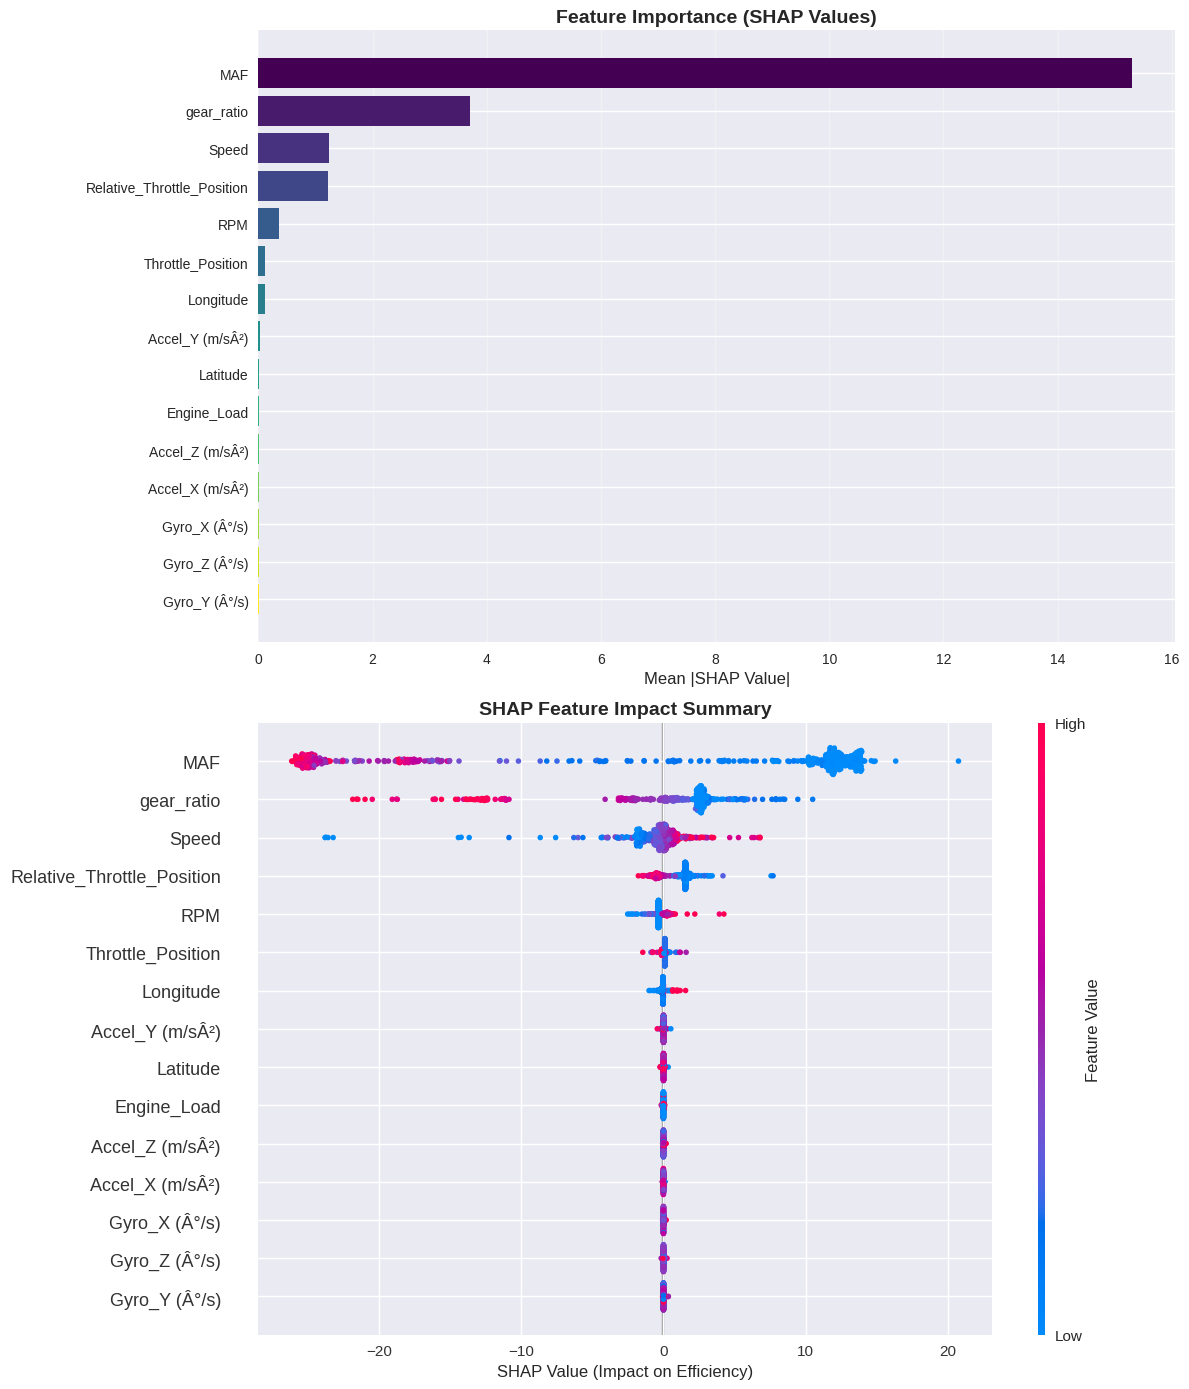


📈 STEP 8: Efficiency curve analysis...


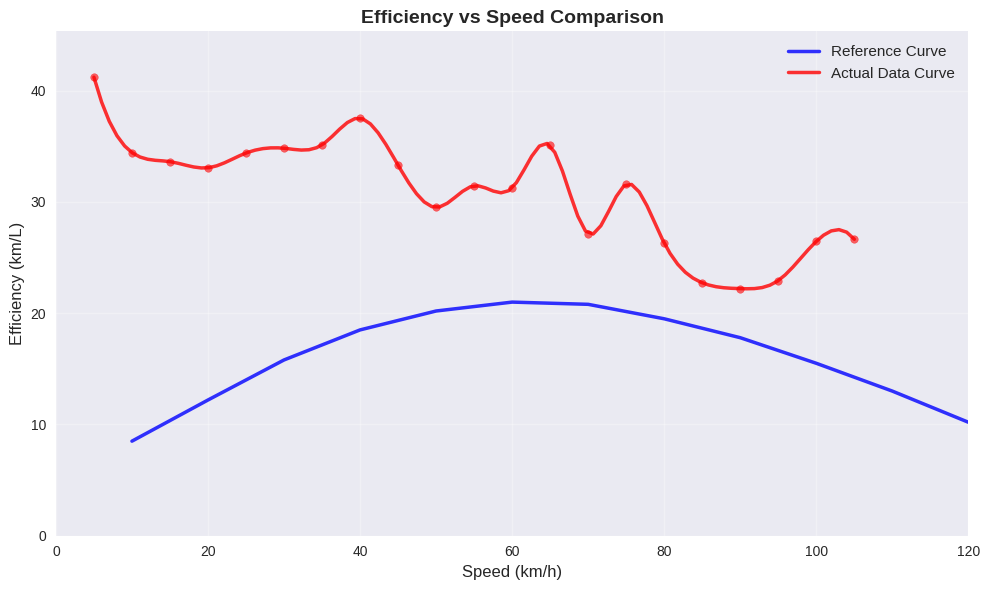

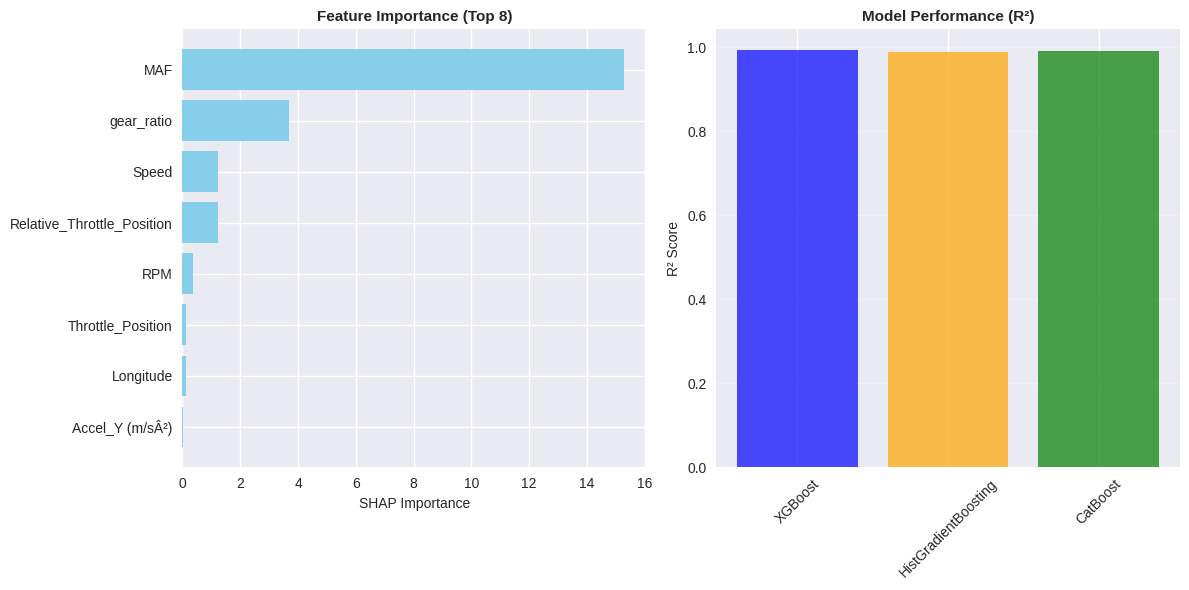


🎯 STEP 9: Optimal RPM and Gear Ratio Prediction...

🔄 Analyzing speed range: 0-20 km/h
  ✅ Optimal RPM: 1100
  ✅ Optimal Gear Ratio: 3.04
  ✅ Predicted Efficiency: 48.120 km/L
  📊 Improvement: 18.954 km/L

🔄 Analyzing speed range: 20-40 km/h
  ✅ Optimal RPM: 1300
  ✅ Optimal Gear Ratio: 1.73
  ✅ Predicted Efficiency: 50.214 km/L
  📊 Improvement: 14.925 km/L

🔄 Analyzing speed range: 40-60 km/h
  ✅ Optimal RPM: 1000
  ✅ Optimal Gear Ratio: 0.68
  ✅ Predicted Efficiency: 49.164 km/L
  📊 Improvement: 16.458 km/L

🔄 Analyzing speed range: 60-80 km/h
  ✅ Optimal RPM: 1000
  ✅ Optimal Gear Ratio: 0.58
  ✅ Predicted Efficiency: 49.788 km/L
  📊 Improvement: 16.694 km/L

🔄 Analyzing speed range: 80-100 km/h
  ✅ Optimal RPM: 1100
  ✅ Optimal Gear Ratio: 0.48
  ✅ Predicted Efficiency: 23.571 km/L
  📊 Improvement: 0.368 km/L

🔄 Analyzing speed range: 100-120 km/h
  ⚠️ Insufficient data for range 100-120

📊 Optimization Results Summary:
  Speed_Range  Optimal_RPM  Optimal_Gear_Ratio  Predicted_Eff

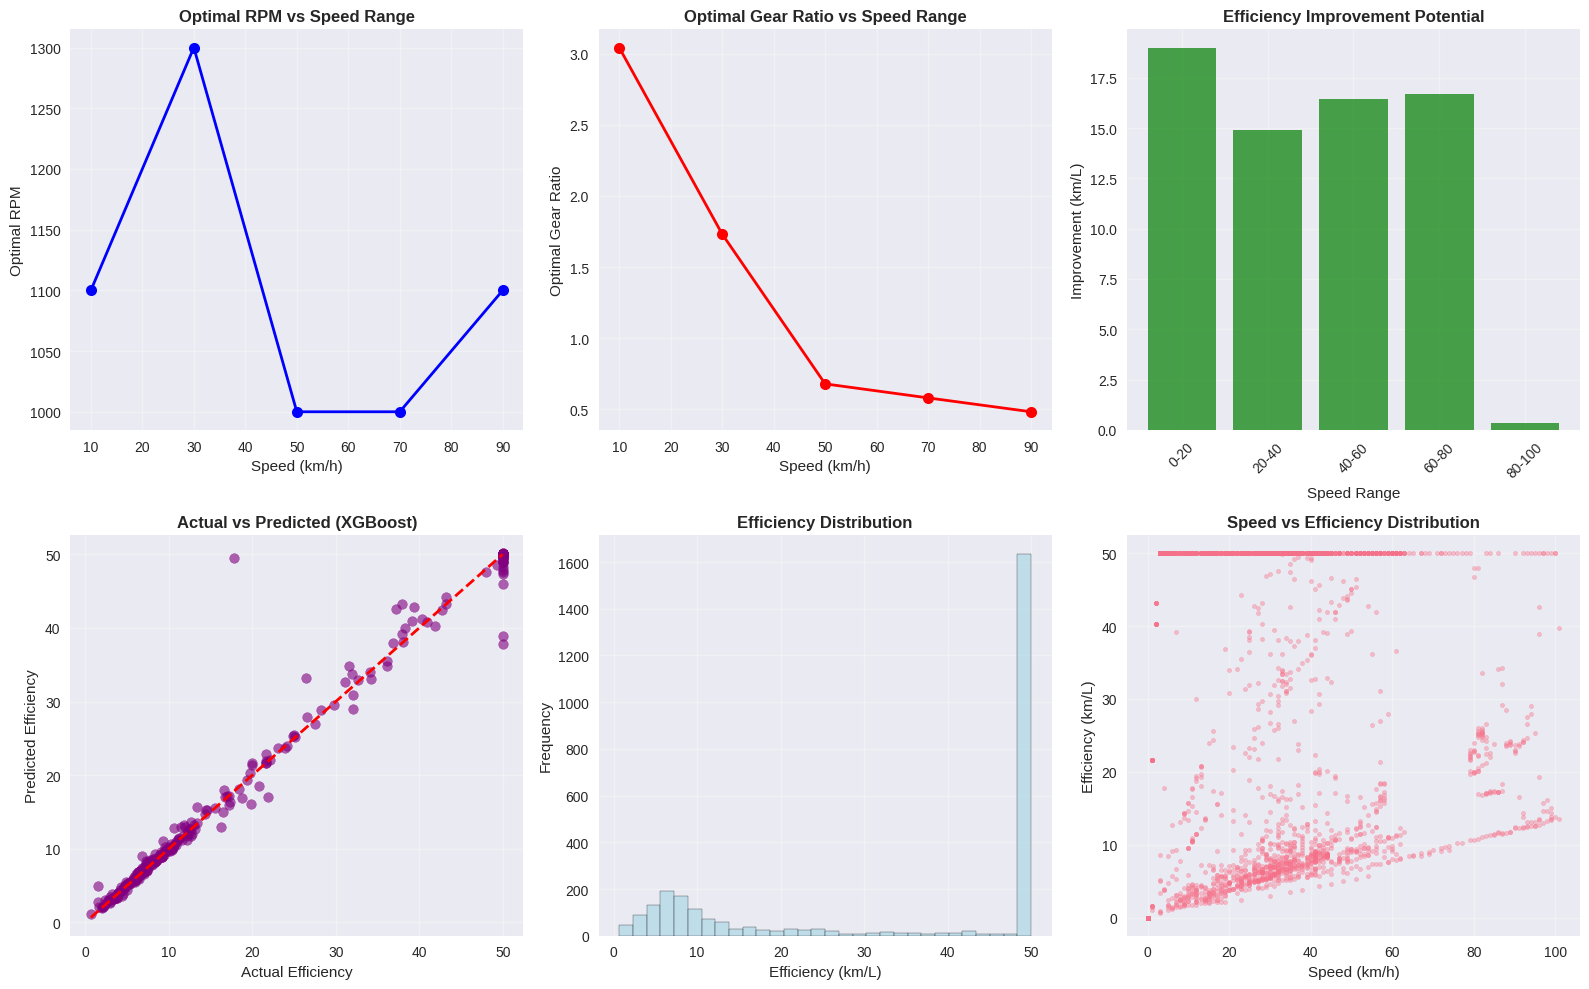

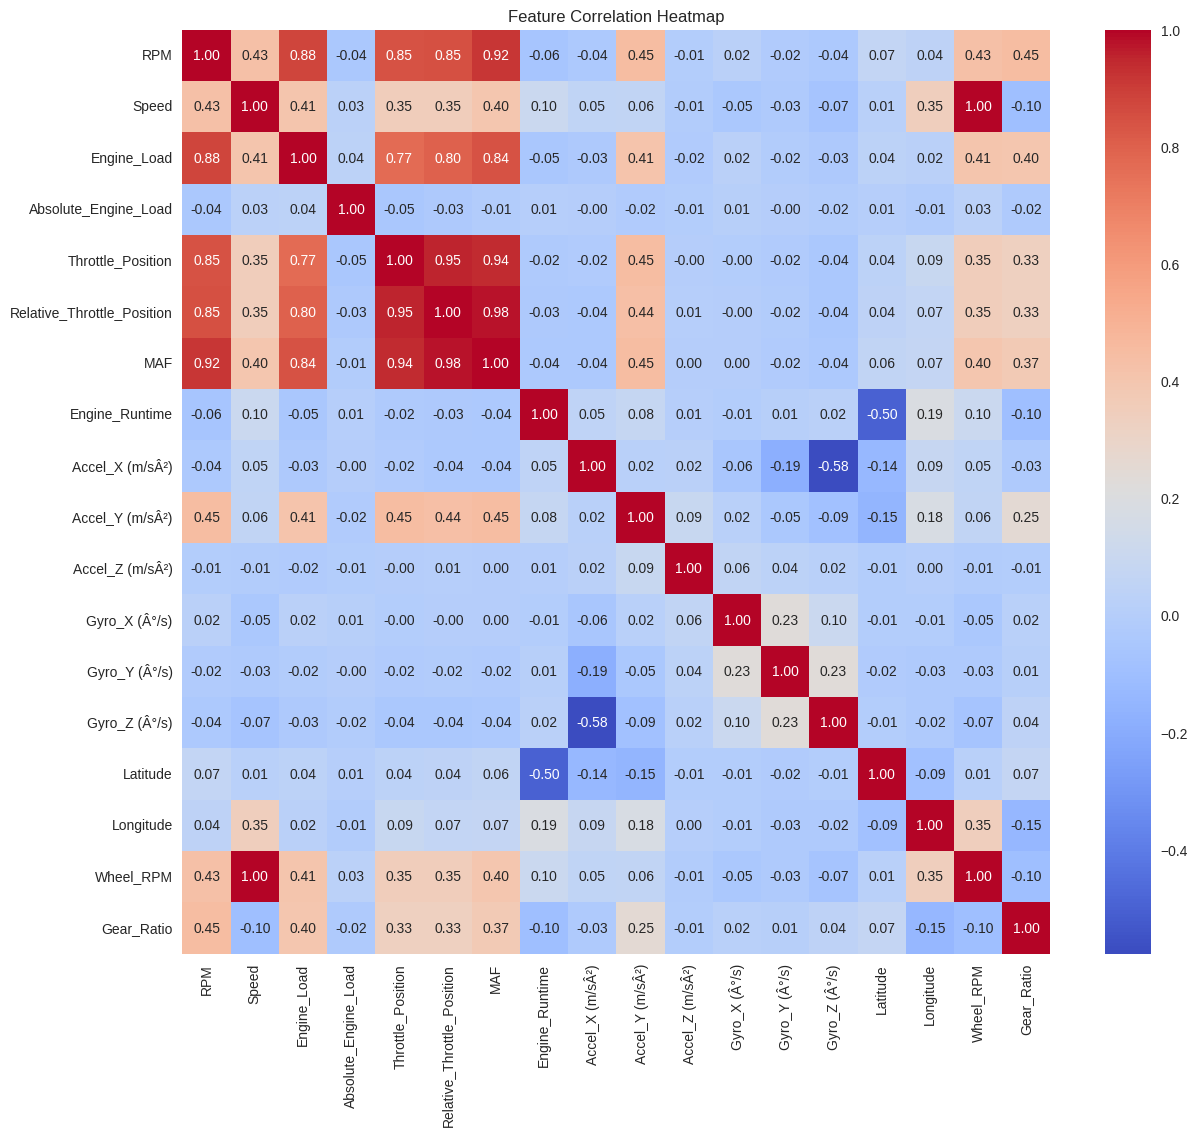


📋 FINAL SUMMARY AND RECOMMENDATIONS

🏆 Best Model: XGBoost
   R² Score: 0.9930
   RMSE: 1.6765

🔍 Most Important Features:
   6. MAF: 15.2946
   3. gear_ratio: 3.7008
   2. Speed: 1.2395
   7. Relative_Throttle_Position: 1.2214
   1. RPM: 0.3662

🎯 Optimization Recommendations:
   Speed 0-20 km/h:
     - Use RPM: 1100
     - Use Gear Ratio: 3.04
     - Expected improvement: 18.954 km/L
   Speed 20-40 km/h:
     - Use RPM: 1300
     - Use Gear Ratio: 1.73
     - Expected improvement: 14.925 km/L
   Speed 40-60 km/h:
     - Use RPM: 1000
     - Use Gear Ratio: 0.68
     - Expected improvement: 16.458 km/L
   Speed 60-80 km/h:
     - Use RPM: 1000
     - Use Gear Ratio: 0.58
     - Expected improvement: 16.694 km/L
   Speed 80-100 km/h:
     - Use RPM: 1100
     - Use Gear Ratio: 0.48
     - Expected improvement: 0.368 km/L

💡 Key Insights:
   - Average efficiency in dataset: 32.34 km/L
   - Peak efficiency achieved: 50.00 km/L
   - Most efficient speed range: 21.0 km/h

📊 Data Quality:


In [ ]:
# Install required packages
!pip install scikit-learn pandas numpy matplotlib seaborn openpyxl xgboost catboost shap

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

# Machine Learning models
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from scipy.interpolate import interp1d

# SHAP for feature importance
import shap

# Google Colab file upload
from google.colab import files

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== Enhanced Vehicle Efficiency Analysis System ===")
print("This notebook will:")
print("1. Load your vehicle data from Excel/CSV file")
print("2. Calculate efficiency using MAF data with proper formulas")
print("3. Train multiple models: XGBoost, HistGradientBoosting, CatBoost")
print("4. Perform SHAP analysis for feature importance")
print("5. Predict optimal RPM and gear ratios for speed ranges")
print("6. Provide comprehensive optimization recommendations")
print("\n" + "="*60)

# Step 1: File Upload
print("\n📁 STEP 1: Upload your data file")
print("Please upload your vehicle data file (Excel or CSV)...")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]
print(f"✅ File uploaded: {filename}")

# Step 2: Load and preprocess data
print("\n📊 STEP 2: Loading and preprocessing data...")

# Load the data based on file type
if filename.endswith('.csv'):
    data = pd.read_csv(filename)
else:
    # Read all sheets into a dictionary
    all_sheets = pd.read_excel(filename, sheet_name=None)
    # Concatenate all sheets into a single DataFrame
    data = pd.concat(all_sheets.values(), ignore_index=True)

print(f"Initial data shape: {data.shape}")
print(f"Columns: {list(data.columns)}")

# Replace 'N/A' with NaN and handle missing values
data.replace('N/A', pd.NA, inplace=True)
data = data.dropna()

print(f"Data shape after cleaning: {data.shape}")
print("\n📋 First 5 rows of cleaned data:")
print(data.head())

# Step 3: Calculate fuel efficiency using MAF method
print("\n⚡ STEP 3: Calculating fuel efficiency using MAF method...")

# Constants for efficiency calculation
AIR_FUEL_RATIO = 14.7  # Stoichiometric ratio for gasoline
GASOLINE_DENSITY = 740  # g/L

# Calculate instantaneous fuel consumption (liters per second)
data['fuel_consumption_per_second'] = np.where(data['MAF'] > 0,
                                              data['MAF'] / (AIR_FUEL_RATIO * GASOLINE_DENSITY),
                                              0)

# Calculate distance traveled per 1-second interval (km)
data['speed_mps'] = data['Speed'] / 3.6  # Convert km/h to m/s
data['distance_per_interval'] = (data['speed_mps'] * 1) / 1000  # Distance in km for 1 second

# Calculate total fuel consumption and distance
total_fuel_consumption = data['fuel_consumption_per_second'].sum()
total_distance = data['distance_per_interval'].sum()

# Calculate efficiency (km/L) - using instantaneous method for better analysis
data['efficiency'] = np.where(data['fuel_consumption_per_second'] > 0,
                             (data['speed_mps'] * 3.6) / (data['fuel_consumption_per_second'] * 3600),
                             0)

# Clean efficiency values
data['efficiency'] = data['efficiency'].replace([np.inf, -np.inf], 0)
data['efficiency'] = data['efficiency'].clip(lower=0, upper=50)  # Reasonable limits

print(f"✅ Efficiency calculated!")
print(f"Total fuel consumption: {total_fuel_consumption:.4f} liters")
print(f"Total distance: {total_distance:.4f} km")
print(f"Overall efficiency: {total_distance/total_fuel_consumption:.2f} km/L")
print(f"Average instantaneous efficiency: {data['efficiency'].mean():.2f} km/L")

# Step 4: Calculate gear ratio
print("\n⚙️ STEP 4: Calculating gear ratio...")

# Given parameters
FINAL_DRIVE_RATIO = 3.19
WHEEL_DIAMETER = 0.6086  # meters
WHEEL_CIRCUMFERENCE = math.pi * WHEEL_DIAMETER

# Calculate wheel RPM and gear ratio
wheel_rpm = (data['Speed'] * 1000) / (60 * WHEEL_CIRCUMFERENCE)
data['gear_ratio'] = np.where(data['Speed'] > 0,
                             (data['RPM'] / wheel_rpm) * (1 / FINAL_DRIVE_RATIO),
                             np.nan)

print(f"✅ Gear ratio calculated!")
print(f"Average gear ratio: {data['gear_ratio'].mean():.2f}")
print(f"Gear ratio range: {data['gear_ratio'].min():.2f} - {data['gear_ratio'].max():.2f}")

# Step 5: Prepare features for modeling
print("\n🔧 STEP 5: Preparing features for modeling...")

# Define feature columns (adjust based on your data)
base_features = ['RPM', 'Speed', 'gear_ratio', 'Engine_Load', 'Throttle_Position', 'MAF']

# Add additional features if available
optional_features = [
    'Relative_Throttle_Position', 'Accel_X (m/sÂ²)', 'Accel_Y (m/sÂ²)',
    'Accel_Z (m/sÂ²)', 'Gyro_X (Â°/s)', 'Gyro_Y (Â°/s)', 'Gyro_Z (Â°/s)',
    'Latitude', 'Longitude', 'Absolute_Engine_Load'
]

# Check which features are available
available_features = base_features.copy()
for feature in optional_features:
    if feature in data.columns:
        available_features.append(feature)

print(f"Available features: {available_features}")

# Prepare the dataset
X = data[available_features].copy()
y = data['efficiency'].copy()

# Remove rows with NaN values
mask = ~(X.isnull().any(axis=1) | y.isnull())
X = X[mask]
y = y[mask]

print(f"Final dataset shape: {X.shape}")
print(f"Target variable statistics:")
print(f"  Mean: {y.mean():.3f}")
print(f"  Std: {y.std():.3f}")
print(f"  Min: {y.min():.3f}")
print(f"  Max: {y.max():.3f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train multiple models
print("\n🤖 STEP 6: Training multiple regression models...")

# Initialize models
models = {
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        verbosity=0
    ),
    'HistGradientBoosting': HistGradientBoostingRegressor(
        max_iter=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    ),
    'CatBoost': CatBoostRegressor(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_state=42,
        verbose=False
    )
}

# Train models and evaluate
model_results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n📈 Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)

    model_results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'mse': test_mse,
        'mae': test_mae,
        'rmse': np.sqrt(test_mse)
    }

    trained_models[name] = model

    print(f"  Training R²: {train_r2:.4f}")
    print(f"  Testing R²: {test_r2:.4f}")
    print(f"  RMSE: {np.sqrt(test_mse):.4f}")
    print(f"  MAE: {test_mae:.4f}")

# Find best model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['test_r2'])
best_model = trained_models[best_model_name]

print(f"\n🏆 Best model: {best_model_name} (R² = {model_results[best_model_name]['test_r2']:.4f})")


# Step 7: SHAP Analysis for Feature Importance
print("\n🔍 STEP 7: SHAP Analysis for Feature Importance...")

# Create SHAP explainer for the best model
if best_model_name == 'XGBoost':
    explainer = shap.TreeExplainer(best_model)
elif best_model_name == 'CatBoost':
    explainer = shap.TreeExplainer(best_model)
else:  # HistGradientBoosting
    explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Create feature importance dataframe
if isinstance(shap_values, list):
    shap_values = shap_values[0]

feature_importance = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP_Importance': np.abs(shap_values).mean(axis=0)
}).sort_values('SHAP_Importance', ascending=False)

print("\n📊 Feature Importance (SHAP):")
print(feature_importance)

# Enhanced SHAP Visualization
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)  # Top plot for bar chart

# Feature importance bar plot
top_features = feature_importance.head(15)
plt.barh(top_features['Feature'], top_features['SHAP_Importance'],
         color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
plt.xlabel('Mean |SHAP Value|', fontsize=12)
plt.title('Feature Importance (SHAP Values)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

# SHAP Summary Plot (Beeswarm)
plt.subplot(2, 1, 2)  # Bottom plot for beeswarm
shap.summary_plot(shap_values, X_test, plot_type="dot", max_display=15, show=False,
                 color_bar_label='Feature Value')
plt.xlabel('SHAP Value (Impact on Efficiency)', fontsize=12)
plt.title('SHAP Feature Impact Summary', fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(12, 14)  # Adjust overall figure size
plt.tight_layout()
plt.show()


# Step 8: Efficiency curve analysis
print("\n📈 STEP 8: Efficiency curve analysis...")

# Create theoretical reference curve for comparison - CHANGE THIS
reference_curve_data = {
    'Speed_km_h': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    'Efficiency_km_L': [8.5, 12.2, 15.8, 18.5, 20.2, 21.0, 20.8, 19.5, 17.8, 15.5, 13.0, 10.2]
}
reference_curve = pd.DataFrame(reference_curve_data)

# Calculate actual efficiency curve from data
speed_bins = np.arange(0, data['Speed'].max() + 10, 5)
data['Speed_Bin'] = pd.cut(data['Speed'], speed_bins, labels=speed_bins[1:])
actual_efficiency_curve = data.groupby('Speed_Bin')['efficiency'].mean().reset_index()
actual_efficiency_curve['Speed_Bin'] = actual_efficiency_curve['Speed_Bin'].astype(float)

# Create smooth interpolation for actual curve
valid_data = actual_efficiency_curve.dropna()
if len(valid_data) > 3:
    f_interp = interp1d(valid_data['Speed_Bin'], valid_data['efficiency'],
                       kind='cubic', fill_value='extrapolate')
    smooth_speeds = np.linspace(valid_data['Speed_Bin'].min(),
                               valid_data['Speed_Bin'].max(), 100)
    smooth_efficiency = f_interp(smooth_speeds)

    # Clip extreme values for realistic results
    smooth_efficiency = np.clip(smooth_efficiency, 0, 50)
else:
    smooth_speeds = valid_data['Speed_Bin'].values
    smooth_efficiency = valid_data['efficiency'].values


# Plot efficiency curves
plt.figure(figsize=(10, 6))
plt.plot(reference_curve['Speed_km_h'], reference_curve['Efficiency_km_L'],
         'b-', label='Reference Curve', linewidth=2.5, alpha=0.8)
# Check if smooth_speeds and smooth_efficiency are not empty before plotting
if len(smooth_speeds) > 0 and len(smooth_efficiency) > 0:
    plt.plot(smooth_speeds, smooth_efficiency,
             'r-', label='Actual Data Curve', linewidth=2.5, alpha=0.8)
    plt.scatter(actual_efficiency_curve['Speed_Bin'], actual_efficiency_curve['efficiency'],
               color='red', s=30, alpha=0.6, zorder=5)
plt.xlabel('Speed (km/h)', fontsize=12)
plt.ylabel('Efficiency (km/L)', fontsize=12)
plt.title('Efficiency vs Speed Comparison', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(0, max(data['Speed'].max(), 120))
plt.ylim(0, max(reference_curve['Efficiency_km_L'].max(),
                actual_efficiency_curve['efficiency'].max() if not actual_efficiency_curve.empty else 0) * 1.1)
plt.tight_layout()
plt.show()

# Plot feature importance and model comparison
plt.figure(figsize=(12, 6))

# Feature importance plot (smaller size)
plt.subplot(1, 2, 1)
top_features = feature_importance.head(8)
plt.barh(range(len(top_features)), top_features['SHAP_Importance'], color='skyblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('SHAP Importance', fontsize=10)
plt.title('Feature Importance (Top 8)', fontsize=11, fontweight='bold')
plt.gca().invert_yaxis()

# Model comparison
plt.subplot(1, 2, 2)
model_names = list(model_results.keys())
r2_scores = [model_results[name]['test_r2'] for name in model_names]
plt.bar(model_names, r2_scores, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Model Performance (R²)', fontsize=11, fontweight='bold')
plt.ylabel('R² Score', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Step 9: Optimal RPM and Gear Ratio Prediction
print("\n🎯 STEP 9: Optimal RPM and Gear Ratio Prediction...")

# Define speed ranges
speed_ranges = [(0, 20), (20, 40), (40, 60), (60, 80), (80, 100), (100, 120)]

optimization_results = []

for lower, upper in speed_ranges:
    print(f"\n🔄 Analyzing speed range: {lower}-{upper} km/h")

    # Filter data for current speed range
    range_data = data[(data['Speed'] >= lower) & (data['Speed'] < upper)]

    if len(range_data) < 10:
        print(f"  ⚠️ Insufficient data for range {lower}-{upper}")
        continue

    # Find optimal point from reference curve
    range_curve = reference_curve[
        (reference_curve['Speed_km_h'] >= lower) &
        (reference_curve['Speed_km_h'] < upper)
    ]

    if len(range_curve) == 0:
        target_speed = (lower + upper) / 2
        target_efficiency = reference_curve['Efficiency_km_L'].max()
    else:
        optimal_idx = range_curve['Efficiency_km_L'].idxmax()
        target_speed = range_curve.loc[optimal_idx, 'Speed_km_h']
        target_efficiency = range_curve.loc[optimal_idx, 'Efficiency_km_L']

    # Create optimization grid
    rpm_range = np.arange(1000, 4000, 100)
    speed_grid = np.arange(max(lower, target_speed - 5),
                          min(upper, target_speed + 5), 2)

    if len(speed_grid) == 0:
        speed_grid = [target_speed]

    # Generate all combinations
    grid_combinations = []
    for rpm in rpm_range:
        for speed in speed_grid:
            if speed > 0:
                wheel_rpm = (speed * 1000) / (60 * WHEEL_CIRCUMFERENCE)
                gear_ratio = (rpm / wheel_rpm) * (1 / FINAL_DRIVE_RATIO)
                grid_combinations.append([rpm, speed, gear_ratio])

    if not grid_combinations:
        continue

    # Create grid DataFrame
    grid_df = pd.DataFrame(grid_combinations, columns=['RPM', 'Speed', 'gear_ratio'])

    # Fill other features with median values from range data
    for col in available_features:
        if col not in ['RPM', 'Speed', 'gear_ratio']:
            grid_df[col] = range_data[col].median()

    # Predict efficiency using best model
    try:
        grid_predictions = best_model.predict(grid_df[available_features])
        grid_df['predicted_efficiency'] = grid_predictions

        # Find best combination
        best_idx = grid_df['predicted_efficiency'].idxmax()
        best_combination = grid_df.loc[best_idx]

        result = {
            'Speed_Range': f"{lower}-{upper}",
            'Target_Speed': target_speed,
            'Target_Efficiency': target_efficiency,
            'Optimal_RPM': best_combination['RPM'],
            'Optimal_Gear_Ratio': best_combination['gear_ratio'],
            'Predicted_Efficiency': best_combination['predicted_efficiency'],
            'Current_Avg_RPM': range_data['RPM'].mean(),
            'Current_Avg_Efficiency': range_data['efficiency'].mean(),
            'Improvement_Potential': best_combination['predicted_efficiency'] - range_data['efficiency'].mean()
        }

        optimization_results.append(result)

        print(f"  ✅ Optimal RPM: {best_combination['RPM']:.0f}")
        print(f"  ✅ Optimal Gear Ratio: {best_combination['gear_ratio']:.2f}")
        print(f"  ✅ Predicted Efficiency: {best_combination['predicted_efficiency']:.3f} km/L")
        print(f"  📊 Improvement: {result['Improvement_Potential']:.3f} km/L")

    except Exception as e:
        print(f"  ❌ Error in optimization: {e}")

# Convert results to DataFrame
if optimization_results:
    optimization_df = pd.DataFrame(optimization_results)
    print("\n📊 Optimization Results Summary:")
    print(optimization_df[['Speed_Range', 'Optimal_RPM', 'Optimal_Gear_Ratio',
                          'Predicted_Efficiency', 'Improvement_Potential']])
else:
    print("\n⚠️ No optimization results generated")


# Step 10: Visualization and Summary
print("\n📈 STEP 10: Final Visualization and Summary...")

if optimization_results:
    # Create comprehensive visualization
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))

    # Plot 1: Optimal RPM vs Speed Range
    speed_midpoints = [float(r['Speed_Range'].split('-')[0]) + 10 for r in optimization_results]
    optimal_rpms = [r['Optimal_RPM'] for r in optimization_results]

    axes[0, 0].plot(speed_midpoints, optimal_rpms, 'bo-', markersize=8, linewidth=2)
    axes[0, 0].set_title('Optimal RPM vs Speed Range', fontweight='bold')
    axes[0, 0].set_xlabel('Speed (km/h)')
    axes[0, 0].set_ylabel('Optimal RPM')
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Optimal Gear Ratio vs Speed Range
    optimal_gears = [r['Optimal_Gear_Ratio'] for r in optimization_results]
    axes[0, 1].plot(speed_midpoints, optimal_gears, 'ro-', markersize=8, linewidth=2)
    axes[0, 1].set_title('Optimal Gear Ratio vs Speed Range', fontweight='bold')
    axes[0, 1].set_xlabel('Speed (km/h)')
    axes[0, 1].set_ylabel('Optimal Gear Ratio')
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Efficiency Improvement Potential
    improvements = [r['Improvement_Potential'] for r in optimization_results]
    speed_labels = [r['Speed_Range'] for r in optimization_results]
    axes[0, 2].bar(range(len(improvements)), improvements, color='green', alpha=0.7)
    axes[0, 2].set_title('Efficiency Improvement Potential', fontweight='bold')
    axes[0, 2].set_xlabel('Speed Range')
    axes[0, 2].set_ylabel('Improvement (km/L)')
    axes[0, 2].set_xticks(range(len(speed_labels)))
    axes[0, 2].set_xticklabels(speed_labels, rotation=45)
    axes[0, 2].grid(True, alpha=0.3)

    # Plot 4: Actual vs Predicted (Best Model)
    y_pred_best = best_model.predict(X_test)
    axes[1, 0].scatter(y_test, y_pred_best, alpha=0.6, color='purple')
    axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    axes[1, 0].set_title(f'Actual vs Predicted ({best_model_name})', fontweight='bold')
    axes[1, 0].set_xlabel('Actual Efficiency')
    axes[1, 0].set_ylabel('Predicted Efficiency')
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 5: Efficiency Distribution
    axes[1, 1].hist(y, bins=30, alpha=0.7, edgecolor='black', color='lightblue')
    axes[1, 1].set_title('Efficiency Distribution', fontweight='bold')
    axes[1, 1].set_xlabel('Efficiency (km/L)')
    axes[1, 1].set_ylabel('Frequency')
    axes[1, 1].grid(True, alpha=0.3)

    # Plot 6: Speed vs Efficiency Scatter
    axes[1, 2].scatter(data['Speed'], data['efficiency'], alpha=0.4, s=10)
    axes[1, 2].set_title('Speed vs Efficiency Distribution', fontweight='bold')
    axes[1, 2].set_xlabel('Speed (km/h)')
    axes[1, 2].set_ylabel('Efficiency (km/L)')
    axes[1, 2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

#Feature Correlation Heatmap

# Convert 'time' column to datetime if present and drop it
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.drop('time', axis=1)

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12)) # Increased figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Final Summary
print("\n" + "="*60)
print("📋 FINAL SUMMARY AND RECOMMENDATIONS")
print("="*60)

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   R² Score: {model_results[best_model_name]['test_r2']:.4f}")
print(f"   RMSE: {model_results[best_model_name]['rmse']:.4f}")

print(f"\n🔍 Most Important Features:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   {i+1}. {row['Feature']}: {row['SHAP_Importance']:.4f}")

if optimization_results:
    print(f"\n🎯 Optimization Recommendations:")
    for result in optimization_results:
        if result['Improvement_Potential'] > 0.01:
            print(f"   Speed {result['Speed_Range']} km/h:")
            print(f"     - Use RPM: {result['Optimal_RPM']:.0f}")
            print(f"     - Use Gear Ratio: {result['Optimal_Gear_Ratio']:.2f}")
            print(f"     - Expected improvement: {result['Improvement_Potential']:.3f} km/L")

print(f"\n💡 Key Insights:")
print(f"   - Average efficiency in dataset: {data['efficiency'].mean():.2f} km/L")
print(f"   - Peak efficiency achieved: {data['efficiency'].max():.2f} km/L")
# Check if data is not empty before accessing idxmax
if not data.empty:
    print(f"   - Most efficient speed range: {data.loc[data['efficiency'].idxmax(), 'Speed']:.1f} km/h")

print(f"\n📊 Data Quality:")
print(f"   - Total data points: {len(data)}")
print(f"   - Training samples: {len(X_train)}")
print(f"   - Testing samples: {len(X_test)}")

print("\n✅ Analysis Complete!")
print("📁 Results can be saved for further analysis if needed.")

# Optional: Save results
save_option = input("\nSave results to files? (y/n): ")
if save_option.lower() == 'y':
    # Save model performance
    pd.DataFrame(model_results).T.to_csv('model_performance.csv')

    # Save feature importance
    feature_importance.to_csv('feature_importance.csv', index=False)

    # Save optimization results
    if optimization_results:
        optimization_df.to_csv('optimization_results.csv', index=False)

    print("✅ Results saved to CSV files!")